In [1]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re


In [2]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
plt.style.use('seaborn')

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [3]:
cars = pd.read_csv("CarPrice_Assignment.csv")
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
# All data preparation steps in this cell

# converting symboling to categorical
cars['symboling'] = cars['symboling'].astype('object')


# create new column: car_company
p = re.compile(r'\w+-?\w+')
cars['car_company'] = cars['CarName'].apply(lambda x: re.findall(p, x)[0])


# replacing misspelled car_company names
# volkswagen
cars.loc[(cars['car_company']== "vw") | (cars['car_company'] == "vokswagen"), 'car_company'] = 'volkswagen'
# porsche
cars.loc[cars['car_company'] == "porcshce", 'car_company'] = 'porsche'
# toyota
cars.loc[cars['car_company'] == "toyouta", 'car_company'] = 'toyota'
# nissan
cars.loc[cars['car_company'] == "Nissan", 'car_company'] = 'nissan'
# mazda
cars.loc[cars['car_company'] == "maxda", 'car_company'] = 'mazda'


# drop carname variable
cars = cars.drop('CarName', axis=1)


# split into X and y
X = cars.loc[:, ['symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'car_company']]
y = cars['price']


# dummy v for categorical variables
cars_categorical = X.select_dtypes(include=['object'])
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True) 
X = X.drop(list(cars_categorical.columns), axis=1)
X = pd.concat([X, cars_dummies], axis=1)


In [8]:
cars.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [9]:
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,test_size = 0.3, random_state=101)

In [11]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
hyper_params = [{'n_features_to_select': list(range(2, 40))}]

# specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             
model_cv = GridSearchCV(estimator = rfe, param_grid = hyper_params,scoring= 'r2', cv = folds,return_train_score=True)      
model_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             error_score='raise-deprecating',
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='warn', n_jobs=None,
             param_grid=[{'n_features_to_select': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14, 15, 16, 17,
                                                   18, 19, 20, 21, 22, 23, 24,
                                                   25, 26, 27, 28, 29, 30, 31, ...]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=0)

In [12]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.061103,0.007075,0.001211,3.947703e-04,2,{'n_features_to_select': 2},0.664252,0.793582,0.426325,0.590238,...,0.609758,0.120938,38,0.789810,0.728494,0.769070,0.805459,0.708357,0.760238,0.036597
1,0.061170,0.007629,0.001227,3.860136e-04,3,{'n_features_to_select': 3},0.688497,0.860091,0.382570,0.589585,...,0.660421,0.166832,37,0.850900,0.801402,0.864101,0.811749,0.841598,0.833950,0.023694
2,0.056159,0.005793,0.001224,3.993592e-04,4,{'n_features_to_select': 4},0.695536,0.932415,0.540484,0.595042,...,0.718795,0.145722,36,0.909673,0.841494,0.895280,0.813929,0.876915,0.867458,0.035171
3,0.054507,0.006534,0.000821,4.130425e-04,5,{'n_features_to_select': 5},0.822487,0.937495,0.610346,0.650397,...,0.776251,0.125426,35,0.926300,0.907785,0.899183,0.842702,0.903788,0.895951,0.028172
4,0.051328,0.004516,0.000998,1.793060e-06,6,{'n_features_to_select': 6},0.811115,0.945898,0.679121,0.657267,...,0.795143,0.111980,34,0.930817,0.916244,0.918328,0.876906,0.910706,0.910600,0.018086
5,0.058575,0.006875,0.000998,1.234262e-06,7,{'n_features_to_select': 7},0.825660,0.945960,0.697822,0.674889,...,0.806281,0.104978,33,0.934894,0.920450,0.925936,0.879200,0.935762,0.919248,0.020821
6,0.049624,0.004115,0.000799,3.994748e-04,8,{'n_features_to_select': 8},0.850995,0.949495,0.718912,0.806897,...,0.844588,0.079136,17,0.939938,0.922111,0.931189,0.909416,0.939317,0.928394,0.011489
7,0.047798,0.000841,0.000999,4.298205e-05,9,{'n_features_to_select': 9},0.846633,0.943579,0.745491,0.813488,...,0.849128,0.068436,13,0.942598,0.925104,0.940824,0.920842,0.939455,0.933765,0.008969
8,0.054271,0.006334,0.000998,7.231594e-07,10,{'n_features_to_select': 10},0.833470,0.938555,0.708607,0.842774,...,0.844665,0.078789,16,0.947224,0.930012,0.945063,0.933136,0.939770,0.939041,0.006635
9,0.048891,0.004266,0.000577,4.730535e-04,11,{'n_features_to_select': 11},0.853327,0.942301,0.725061,0.818068,...,0.847358,0.074528,14,0.950993,0.936018,0.945845,0.942727,0.945227,0.944162,0.004879


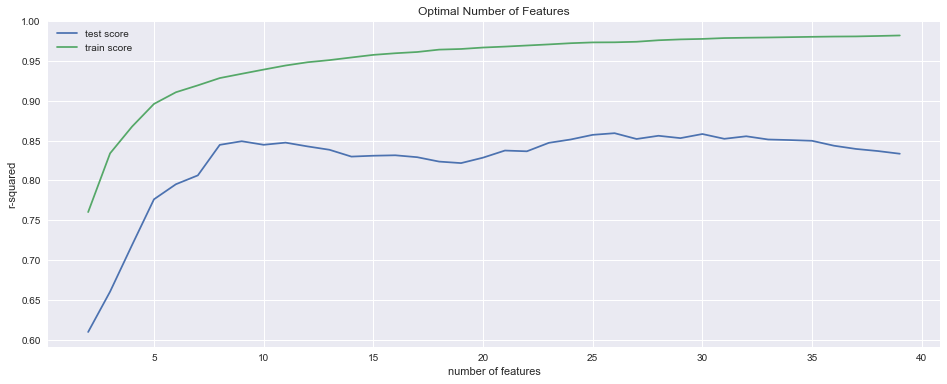

In [13]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')